In [1]:
import sys
import os
from pathlib import Path
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis')
sys.path.append(str(Path.cwd().parent.parent)+'/lund-university-code/TimeSeriesAnalysis/')

In [2]:
import pandas as pd
import TimeSeriesAnalysis.tsa_lth.analysis as analysis
import TimeSeriesAnalysis.tsa_lth.modelling as modelling
import TimeSeriesAnalysis.tsa_lth.tests as tests
from TimeSeriesAnalysis.tsa_lth.tools import *
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import random
import pylab

In [234]:
random.seed(0)
n = 500
A3 = [1, .5]
C3 = [1, -.3, .2]
w = np.sqrt(2) * np.random.randn(n+100)
x = modelling.filter(C3,A3,w)
A1 = [1, -.65]
A2 = [1, .90, .78] 
C = 1 
B = [0, 0, 0, 0, .4]
e = np.sqrt( 1.5 ) * np.random.randn( n + 100) ;
y = np.add(modelling.filter(C, A1, e), modelling.filter(B, A2, x)) ;
x = x[100:]
y = y[100:]

## Question 1

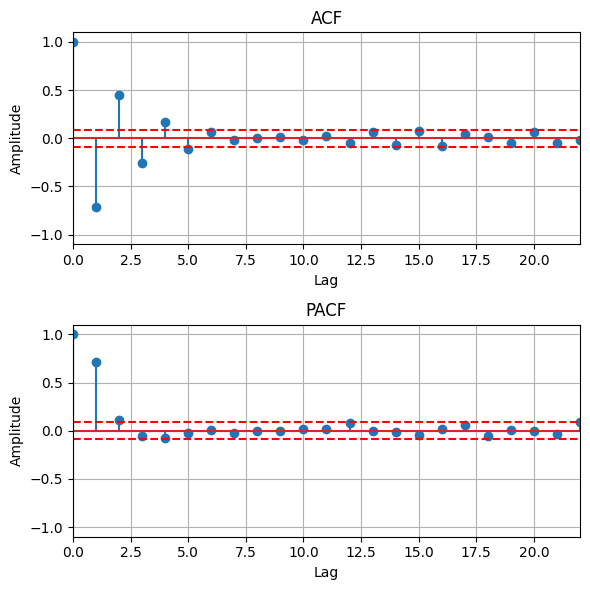

In [236]:
analysis.plotACFnPACF(x)

In [237]:
def getARMA(data, A=0, C=0):
    A_free=A
    C_free=C
    model = modelling.PEM(data, A=A, C=C)
    if isinstance(A, int):
        A_free = [1]*(A+1)
    if isinstance(C, int):
        C_free = [1]*(C+1)
        print(C_free)
    model.set_free_params(A_free=A_free, C_free=C_free)
    model_fitted = model.fit(method='LS', bh=False)
    model_fitted.summary()
    return model_fitted

def checkNormal(data, remove=False, title=None):
    if remove:
        data = data[remove:]
    tests.check_if_normal(data)
    stats.probplot(data, dist="norm", plot=pylab)
    # variable = [ i for i, j in locals().items() if j == data][0]
    if title:
        plt.title(title)
    pylab.show()

[1]
Discrete-time AR model: A(z)y(t) = e(t)

A(z) = 1.0 + 0.7159(±0.0314)·z⁻¹

Polynomial orders: nA = 1
Number of free coefficients: 1
Fit to estimation data (NRMSE): 29.91%
FPE : 2.025  MSE : 2.026
AIC : 1770.341   BIC : 1774.554



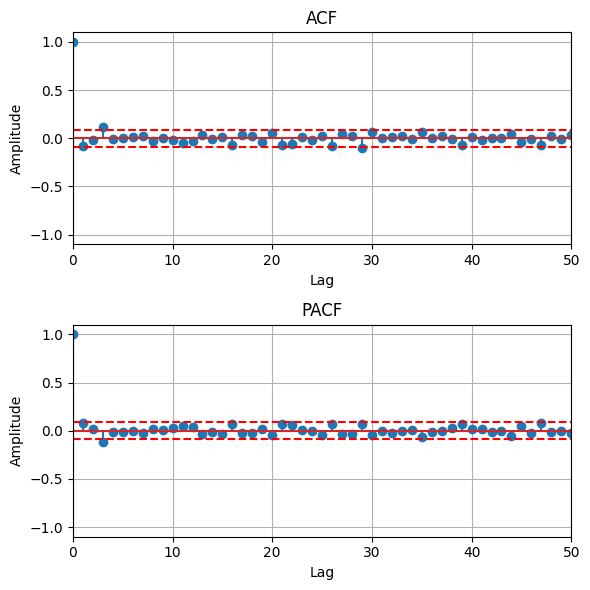

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 19.96 < 31.41)
  McLeod-Li test:        True (white if 18.32 < 31.41)
  Monti test:            True (white if 19.74 < 31.41)
  Sign change test:      True (white if 0.51 in [0.46,0.54])


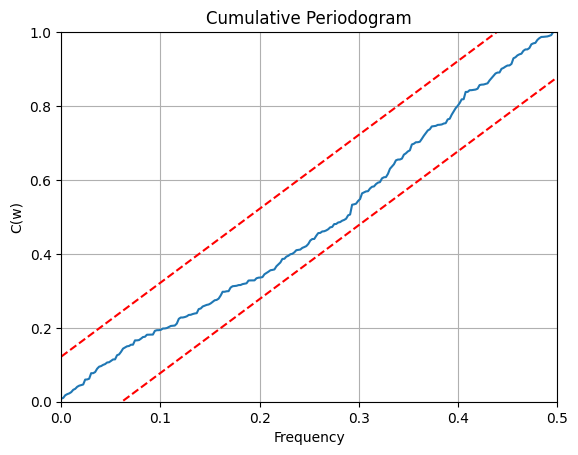

In [238]:
# Here an AR(1) seems to be a reasonable first choice based on the PACF.

A3 = [1,1]
model_x = getARMA(x, A=A3)
res = model_x.resid
acf_est, pacf_est = analysis.plotACFnPACF(res,noLags=50,titleStr=None, return_val=True)
tests.whiteness_test(res)

Discrete-time ARMA model: A(z)y(t) = C(z)e(t)

A(z) = 1.0 + 0.5186(±0.0799)·z⁻¹
C(z) = 1.0 - 0.2808(±0.086)·z⁻¹ + 0.1556(±0.0667)·z⁻²

Polynomial orders: nA = 1    nC = 2
Number of free coefficients: 3
Fit to estimation data (NRMSE): 30.58%
FPE : 2.003  MSE : 1.987
AIC : 1764.849   BIC : 1777.487



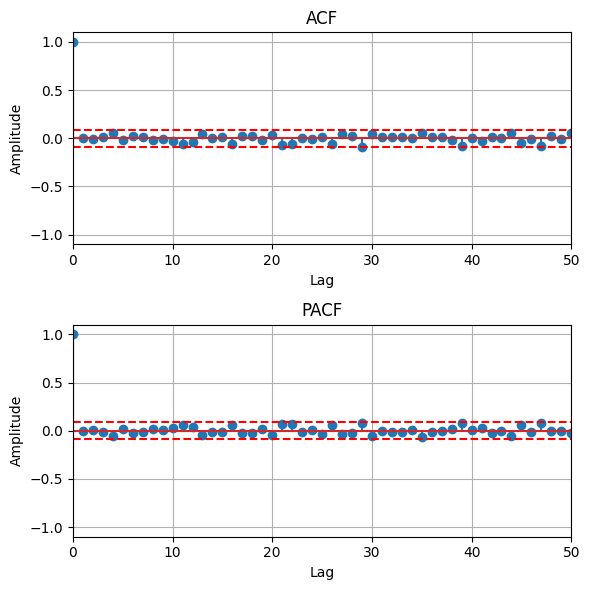

Whiteness test with 5.0% significance
  Ljung-Box-Pierce test: True (white if 9.40 < 31.41)
  McLeod-Li test:        True (white if 20.20 < 31.41)
  Monti test:            True (white if 9.62 < 31.41)
  Sign change test:      True (white if 0.50 in [0.46,0.54])


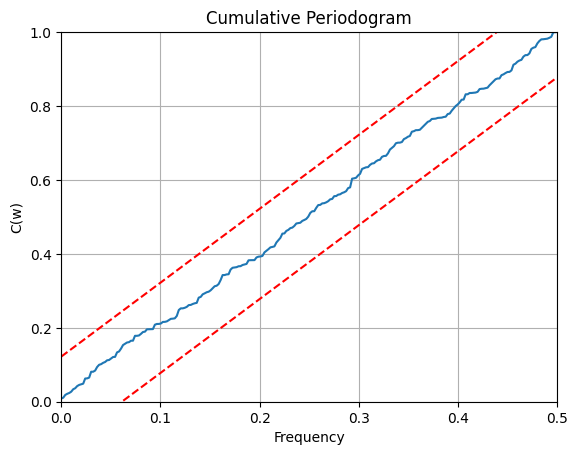

In [239]:
# Check for ARMA(1,2)

A3 = [1,1]
C3 = [1,1,1]
model_x = getARMA(x, A=A3, C=C3)
res = model_x.resid
acf_est, pacf_est = analysis.plotACFnPACF(res,noLags=50,titleStr=None, return_val=True)
tests.whiteness_test(res)

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


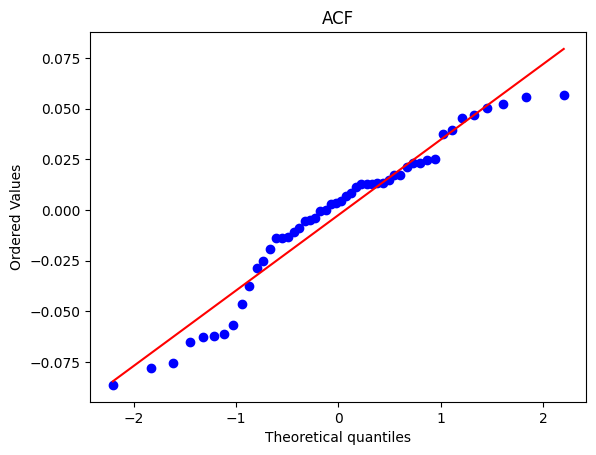

The D'Agostino-Pearson K2 test indicates that the data is NORMAL distributed.


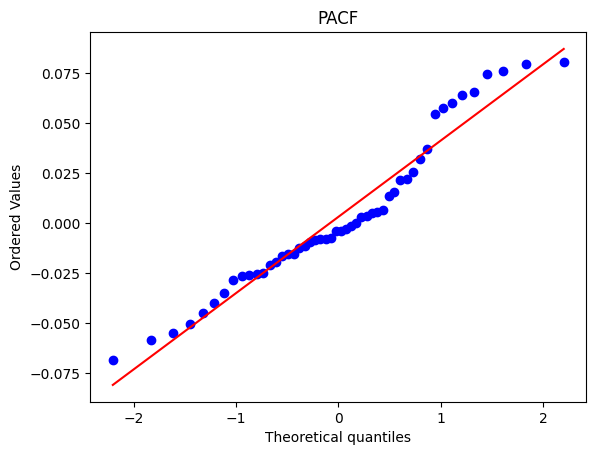

In [240]:
# We check if the acf and pacf are normally distributed to validate our white tests.
checkNormal(acf_est, remove=1, title='ACF')
checkNormal(pacf_est, remove=1, title='PACF')

<StemContainer object of 3 artists>

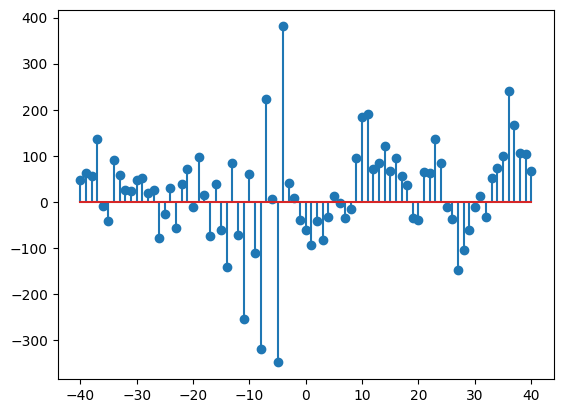

In [241]:
est_A3 = model_x.A
est_C3 = model_x.C
w_t = res
M=40
eps_t = modelling.filter(est_A3, est_C3, y, remove=1)
lags, corr = analysis.xcorr(w_t, eps_t, maxlag=M)
mid = len(lags)//2
plt.stem(lags[:], corr[:])
# plt.ylim([-3, 3])

In [247]:
y

array([ 1.84467556e-02, -8.45050069e-01,  5.02381375e+00, -1.66639031e+00,
        6.28601482e-01,  6.39773822e-01, -2.58830465e+00, -5.22214335e-01,
        1.58174363e+00, -8.61066434e-01,  3.68937807e+00,  2.72404495e+00,
       -4.82263468e-01,  2.22585523e+00,  2.64968852e+00,  2.50207131e+00,
        7.21479004e-01,  2.28597076e+00,  1.31862233e+00, -8.70331915e-01,
        6.42529804e-01, -2.01194362e-01, -1.87565043e+00,  2.38639161e+00,
        1.35688504e-01, -1.48725687e+00,  2.02130090e-01, -3.53347383e+00,
        6.56246557e-01, -3.54593702e+00, -1.70555454e+00, -1.35663639e+00,
        5.60266331e-02,  7.61112022e-01, -3.18000439e+00, -4.33509199e-01,
        2.99733938e-01, -2.48397946e+00,  2.86145162e+00, -8.60219389e-02,
        1.35863002e+00, -1.14788320e+00,  2.46396718e+00,  1.49484213e+00,
        2.38686249e+00,  5.17961492e-01, -3.89571375e+00, -2.11254029e+00,
       -7.62702053e-01,  8.29939591e-01, -2.21102478e+00,  3.26630852e+00,
       -1.92377395e+00,  

In [228]:
eps_t[0]

-5.198435648242236e+34

In [200]:
len(corr)

81

In [201]:
len(lags)

81

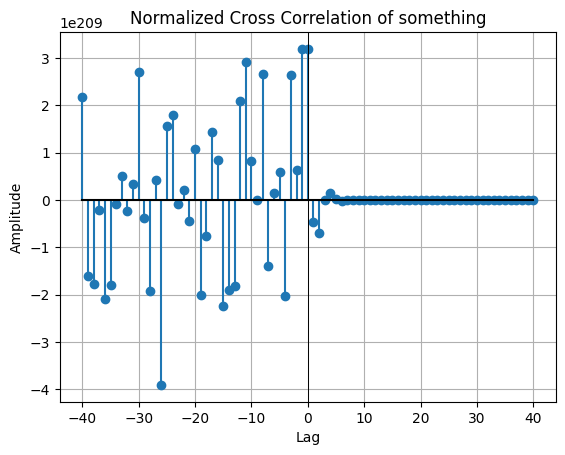

In [216]:
from scipy.signal import correlate, correlation_lags
corr=correlate(w_t,eps_t, mode='full')
lags = correlation_lags(len(w_t), len(eps_t), mode='full')
maxlag=M
numLags=M
beg = np.where(lags==-maxlag)[0][0]
end = np.where(lags==maxlag)[0][0]

mid = len(corr) // 2
corr = corr[mid-maxlag:mid+maxlag+1]
lags = lags[mid-maxlag:mid+maxlag+1]
N=max(len(w_t), len(eps_t))
titleStr = 'something'

rangeLags = np.arange(-numLags, numLags+1, 1)
_,_,baseline = plt.stem(rangeLags, corr)
baseline.set_color('black')
plt.xlabel('Lag')
plt.ylabel('Amplitude')
condInt = 2/np.sqrt(N) * np.ones(len(rangeLags))
maxRange = max(max(np.abs(corr)), 2/np.sqrt(N))*1.1
# plt.plot(rangeLags, condInt, 'red', linestyle='--')
# plt.plot(rangeLags, -condInt, 'red', linestyle='--')
# plt.axis([rangeLags[0], rangeLags[-1], -maxRange, maxRange])
plt.axvline(0, c='black', ls='-', lw=0.7)
plt.title(f'Normalized Cross Correlation of {titleStr}') if titleStr else plt.title('Normalized Cross Correlation')
plt.grid()
plt.show()

In [213]:
condInt

array([0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323, 0.0895323,
       0.0895323, 0.0895323, 0.0895323])

In [206]:
corr

array([ 2.16661114e+209, -1.61186478e+209, -1.77964159e+209,
       -2.16083126e+208, -2.09586036e+209, -1.78997516e+209,
       -8.95868538e+207,  5.06423158e+208, -2.25344848e+208,
        3.32298175e+208,  2.70793997e+209, -3.76766647e+208,
       -1.91119878e+209,  4.33662667e+208, -3.90408995e+209,
        1.57340170e+209,  1.79728218e+209, -8.90190511e+207,
        2.21364042e+208, -4.36228492e+208,  1.07600025e+209,
       -1.99875953e+209, -7.53845242e+208,  1.43267223e+209,
        8.41256840e+208, -2.23978429e+209, -1.89555049e+209,
       -1.82390714e+209,  2.09961876e+209,  2.91167481e+209,
        8.14508304e+208,  6.59514346e+206,  2.66374547e+209,
       -1.39235999e+209,  1.55821564e+208,  5.91970045e+208,
       -2.03302002e+209,  2.63724001e+209,  6.40631083e+208,
        3.18219716e+209,  3.19120689e+209, -4.54393002e+208,
       -6.92768539e+208,  7.74637566e+206,  1.39483273e+208,
        1.51887176e+207, -2.60740085e+207, -6.16662454e+206,
        4.47480675e+206,

In [110]:
np.where(lags==maxlag)[0][0]

439

In [129]:
len(w_t)

499

In [130]:
len(eps_t)

400